In [1]:
 # Project Name : Predicting Customer Churn in a Telecom Company

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from pandas.plotting import scatter_matrix
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import warnings

In [3]:
# Read the sampled dataset

total_data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

total_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
total_data.info()

# 20 columns of features , 1 column for label , 7043 samples

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
# a sample data from the dataset
total_data.iloc[0 , :]

customerID                7590-VHVEG
gender                        Female
SeniorCitizen                      0
Partner                          Yes
Dependents                        No
tenure                             1
PhoneService                      No
MultipleLines       No phone service
InternetService                  DSL
OnlineSecurity                    No
OnlineBackup                     Yes
DeviceProtection                  No
TechSupport                       No
StreamingTV                       No
StreamingMovies                   No
Contract              Month-to-month
PaperlessBilling                 Yes
PaymentMethod       Electronic check
MonthlyCharges                 29.85
TotalCharges                   29.85
Churn                             No
Name: 0, dtype: object

In [6]:
# what labels?
total_data['Churn'].value_counts()


No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
# separating X(total features) and y(total labels)

y = total_data['Churn'].copy()
X = total_data.drop('Churn' , axis=1)

In [8]:
X.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [9]:
y.head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: object

In [10]:
# train_test_split for both classes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

train_samples = pd.concat([pd.DataFrame(X_train) , pd.DataFrame(y_train)], axis=1)
test_samples = pd.concat([pd.DataFrame(X_test) , pd.DataFrame(y_test)], axis=1)

In [11]:
train_samples.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5634 entries, 3738 to 5639
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5634 non-null   object 
 1   gender            5634 non-null   object 
 2   SeniorCitizen     5634 non-null   int64  
 3   Partner           5634 non-null   object 
 4   Dependents        5634 non-null   object 
 5   tenure            5634 non-null   int64  
 6   PhoneService      5634 non-null   object 
 7   MultipleLines     5634 non-null   object 
 8   InternetService   5634 non-null   object 
 9   OnlineSecurity    5634 non-null   object 
 10  OnlineBackup      5634 non-null   object 
 11  DeviceProtection  5634 non-null   object 
 12  TechSupport       5634 non-null   object 
 13  StreamingTV       5634 non-null   object 
 14  StreamingMovies   5634 non-null   object 
 15  Contract          5634 non-null   object 
 16  PaperlessBilling  5634 non-null   objec

In [12]:
train_samples.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3738,4950-BDEUX,Male,0,No,No,35,No,No phone service,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,49.20,1701.65,No
3151,7993-NQLJE,Male,0,Yes,Yes,15,Yes,No,Fiber optic,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,75.10,1151.55,No
4860,7321-ZNSLA,Male,0,Yes,Yes,13,No,No phone service,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,40.55,590.35,No
3867,4922-CVPDX,Female,0,Yes,No,26,Yes,No,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),73.50,1905.7,No
3810,2903-YYTBW,Male,0,Yes,Yes,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,44.55,44.55,No


In [13]:
test_samples.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
437,4376-KFVRS,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),114.05,8468.2,No
2280,2754-SDJRD,Female,1,No,No,8,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Month-to-month,Yes,Credit card (automatic),100.15,908.55,No
2235,9917-KWRBE,Female,0,Yes,Yes,41,Yes,Yes,DSL,Yes,...,Yes,No,Yes,No,One year,Yes,Credit card (automatic),78.35,3211.2,No
4460,0365-GXEZS,Male,0,Yes,No,18,Yes,No,Fiber optic,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,78.20,1468.75,No
3761,9385-NXKDA,Female,0,Yes,No,72,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,Yes,Credit card (automatic),82.65,5919.35,No


In [14]:
# data cleaning


class Preprocessor:
    
    # class attributes
    encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=np.nan)  # prob for unknown test labels
    scaler = StandardScaler()

    def __init__(self, df, usage):
        self.df = df
        self.usage = usage
        
    # drop the id column
    def drop_id(self):
        self.df.drop('customerID' , axis=1 , inplace=True)
        print('customerID is droped!')
        return self.df
    
    # covert TotalCharges to float , drop the ones that can't be converted(empty and non_numerical strings)
    def totalcharges_str_float(self):
        self.df['TotalCharges'] = pd.to_numeric(self.df['TotalCharges'], errors='coerce')
        self.df.dropna(subset=['TotalCharges'], inplace=True)

        print('TotalCharges is done!')
        return self.df
    
    # creating a new feature
    def charge_ratio(self):
        self.df['Charge_Ratio'] = self.df['MonthlyCharges'] / self.df['TotalCharges']
        print('charge ratio column is made!')
        return self.df
        
    # encoding obj type columns
    def encoding(self):
        # separate float type columns , because encoder affects them
        new_df = dict()
        new_df = pd.DataFrame(new_df)
        cols = ['TotalCharges' , 'Charge_Ratio']
        headers = [20 , 21]
        for col , header in zip(cols , headers):
            new_df[header] = self.df[col].copy()
            self.df = self.df.drop(col , axis=1)
        
        # encoding for rest of df
        if self.usage == 'train' :
            self.df = Preprocessor.encoder.fit_transform(self.df)
        else:
            self.df = Preprocessor.encoder.transform(self.df)
        
        # put the float columns back again
        self.df = pd.concat([pd.DataFrame(self.df) , pd.DataFrame(new_df)], axis=1)
        print('encoding is done!')
        
        return pd.DataFrame(self.df)
    
    # filling empty non_obj places
    def num_filler(self):
        for col in self.df.columns:
            if self.df[col].dtypes != 'object':
                mean = self.df[col].mean()
                self.df[col].fillna(mean , inplace=True)
            
        print('fillna num is done!')
        return self.df
    
    # deleting the infinite values (ocurred because of the devision)
    def inf_remover(self):
        self.df.replace([np.inf, -np.inf], np.nan, inplace=True)
        self.df.dropna(inplace=True)
        inf_mask = np.isinf(self.df)
        inf_count = inf_mask.sum().sum()
        print('inf_removing is done!')
        print(str(inf_count) + ' infinite values found in df')
        
        return self.df
    
    # standardizing scale of data
    def standardizing(self):
        # separating the label column , its in column 18 now
        label_col = self.df[18].copy()
        self.df.drop(18 , axis=1, inplace=True)
        
        # standardizing process
        print(f"Data shape before standardizing: {pd.DataFrame(self.df).shape}")
        if self.usage == 'train':
            self.df = Preprocessor.scaler.fit_transform(self.df)
        else:
            self.df = Preprocessor.scaler.transform(self.df)
        
        print('standardizing is done!')
        return pd.DataFrame(self.df) , label_col
    
    # doing all the preprocessing
    def total_preprocessing(self):
        self.df = self.drop_id()
        self.df = self.totalcharges_str_float()
        self.df = self.charge_ratio()
        self.df = self.encoding()
        self.df.dropna(inplace=True)
        self.df = self.num_filler()
        self.df = self.inf_remover()
        self.df , label_col = self.standardizing()
        return self.df , label_col
    
    

In [15]:
# defining objects for class

train_rows = train_samples.copy()
test_rows = test_samples.copy()

total_train_samples = Preprocessor(train_rows , 'train')
total_test_samples = Preprocessor(test_rows , 'test')

In [16]:
processed_train_features , train_label_col = total_train_samples.total_preprocessing()


customerID is droped!
TotalCharges is done!
charge ratio column is made!
encoding is done!
fillna num is done!
inf_removing is done!
0 infinite values found in df
Data shape before standardizing: (4488, 20)
standardizing is done!


In [17]:
processed_test_features , test_label_col = total_test_samples.total_preprocessing()

customerID is droped!
TotalCharges is done!
charge ratio column is made!
encoding is done!
fillna num is done!
inf_removing is done!
0 infinite values found in df
Data shape before standardizing: (235, 20)
standardizing is done!


In [18]:
total_train_samples.df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.995554,-0.441461,-0.970143,-0.648616,0.104812,-2.991859,0.046331,-1.178804,-0.916477,-1.034475,1.234195,-0.929405,1.132000,1.125961,-0.828708,-1.204624,0.414129,-0.683013,-0.992749,2.995992
1,0.995554,-0.441461,1.030776,1.541744,-0.711422,0.334240,-1.009179,0.179469,1.405367,-1.034475,-1.032663,-0.929405,-1.123457,-1.129479,-0.828708,-1.204624,1.351402,0.247756,-0.176600,-0.452367
2,0.995554,-0.441461,1.030776,1.541744,-0.793045,-2.991859,0.046331,-1.178804,1.405367,1.231927,-1.032663,1.383414,-1.123457,-1.129479,1.561550,-1.204624,1.351402,-0.909597,-0.958386,1.210833
3,-1.004466,-0.441461,1.030776,-0.648616,-0.262493,0.334240,-1.009179,-1.178804,-0.916477,1.231927,1.234195,-0.929405,1.132000,1.125961,1.561550,0.830134,-0.523144,0.176671,-0.197995,-0.477827
4,0.995554,-0.441461,1.030776,1.541744,-1.282786,0.334240,-1.009179,-1.178804,-0.916477,-1.034475,-1.032663,-0.929405,-1.123457,-1.129479,-0.828708,-1.204624,0.414129,-0.818519,-0.939295,1.098072


In [19]:
total_test_samples.df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,-1.004466,-0.441461,-0.970143,-0.648616,-0.466552,0.33424,-1.009179,0.179469,-0.916477,1.231927,-1.032663,1.383414,1.132000,1.125961,-0.828708,0.830134,-1.460417,1.207404,-0.150311,-0.397022
1,0.995554,-0.441461,-0.970143,1.541744,-0.548175,0.33424,1.101842,1.537741,0.244445,0.098726,0.100766,0.227005,0.004272,-0.001759,-0.828708,0.830134,-0.523144,-1.280572,-0.873354,-0.209161
2,0.995554,2.265204,-0.970143,-0.648616,-0.629799,0.33424,-1.009179,-1.178804,-0.916477,-1.034475,-1.032663,-0.929405,-1.123457,-1.129479,-0.828708,0.830134,0.414129,-0.796305,0.524916,-0.502294
3,-1.004466,-0.441461,-0.970143,1.541744,-0.548175,0.33424,-1.009179,-1.178804,-0.916477,-1.034475,-1.032663,1.383414,-1.123457,-1.129479,-0.828708,-1.204624,1.351402,-0.700785,0.172984,-0.419881
4,-1.004466,-0.441461,1.030776,-0.648616,1.410786,0.33424,1.101842,0.179469,-0.916477,1.231927,1.234195,-0.929405,1.132000,1.125961,0.366421,0.830134,-1.460417,1.473973,-0.773971,-0.188064


In [20]:
# dataset visualization

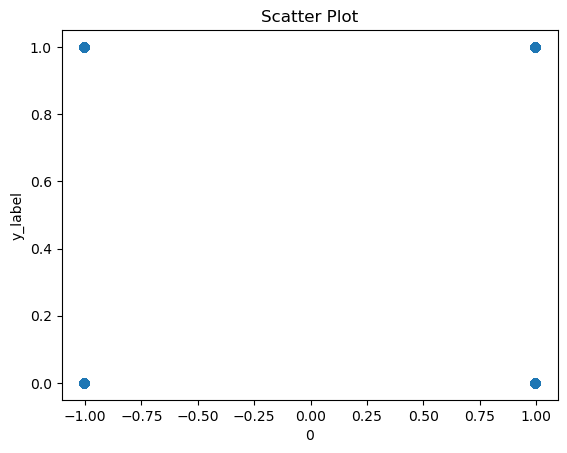

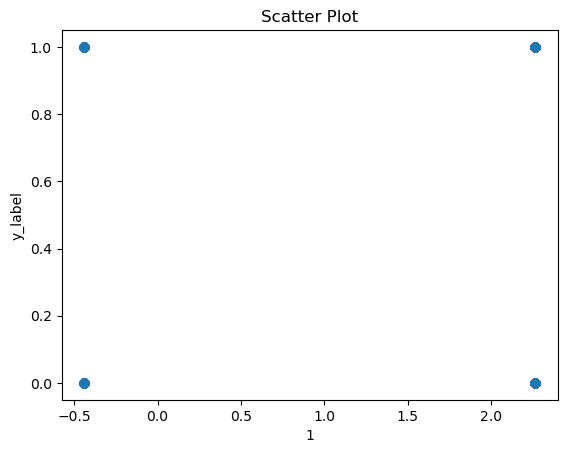

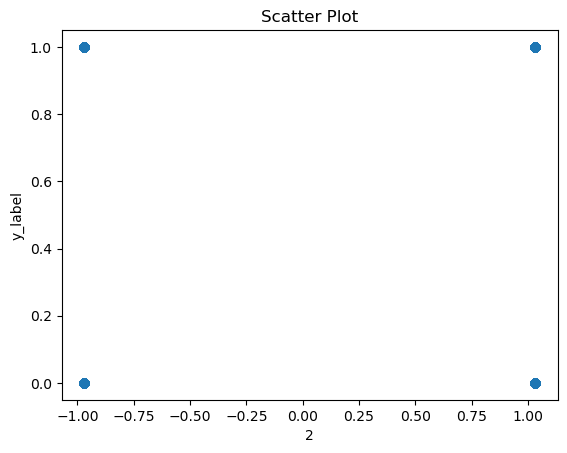

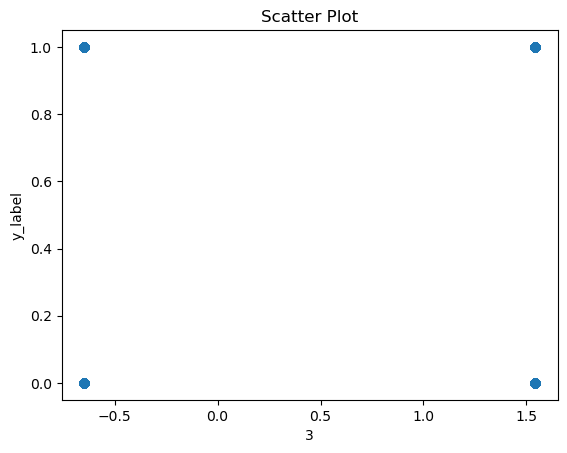

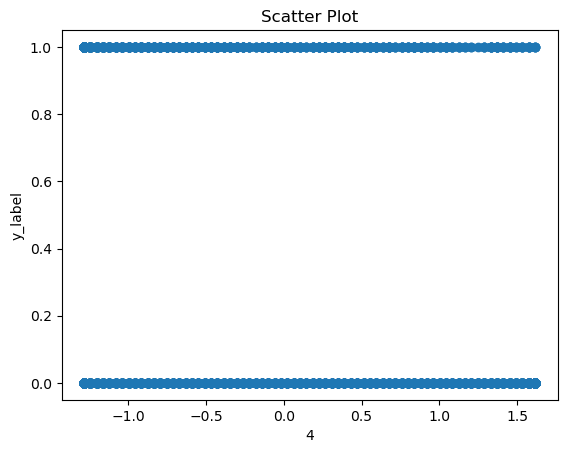

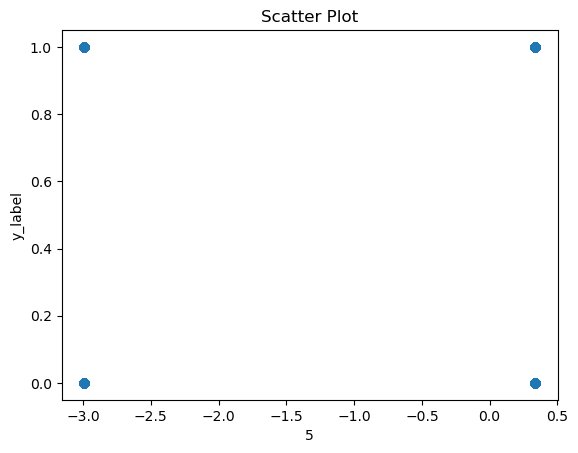

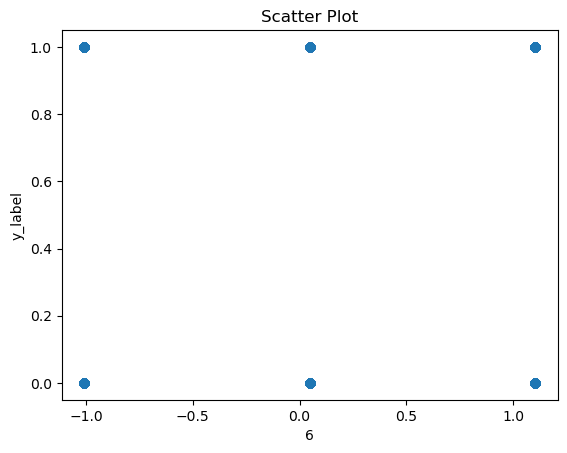

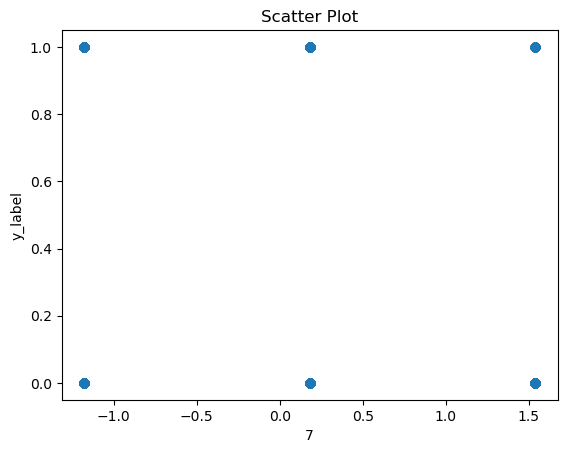

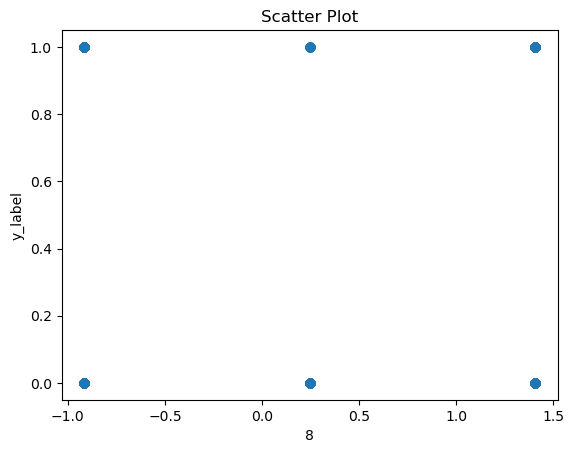

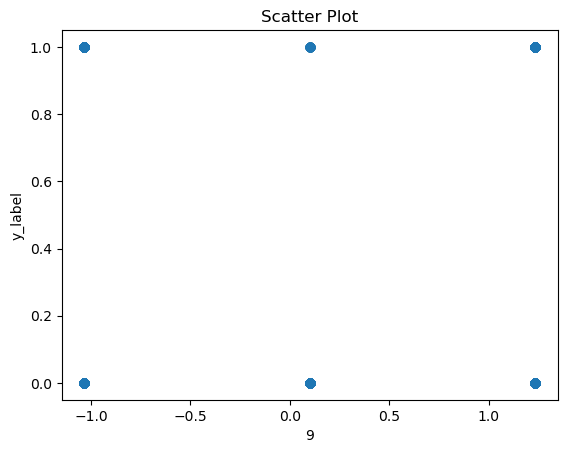

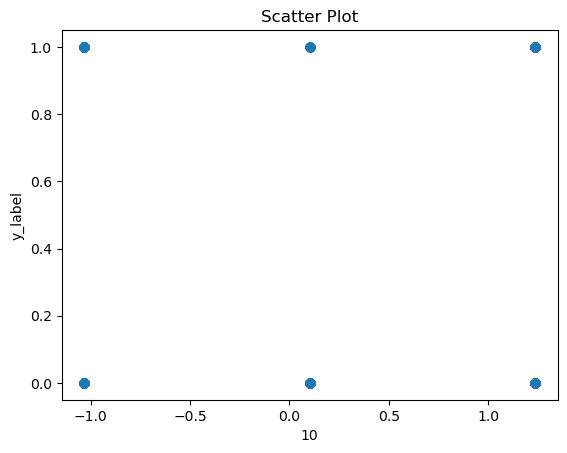

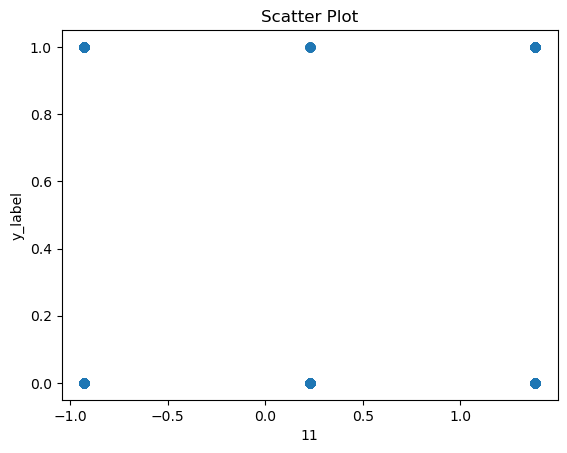

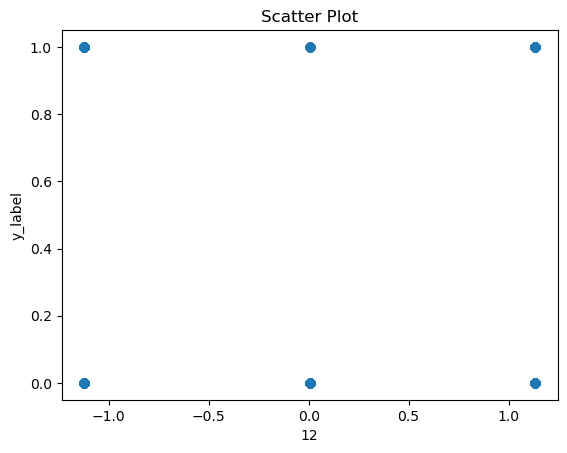

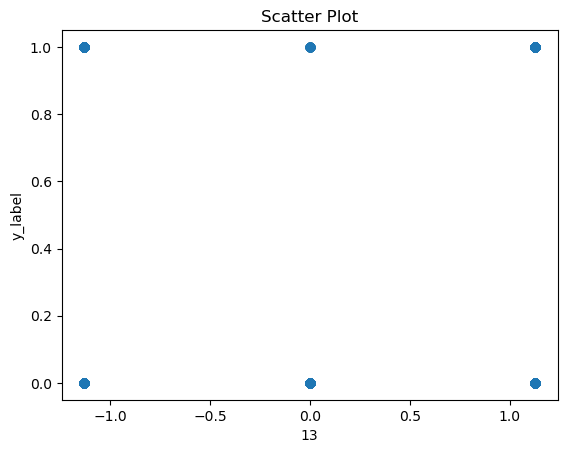

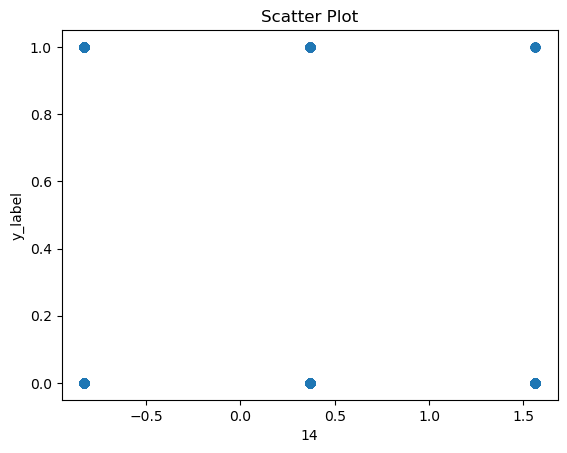

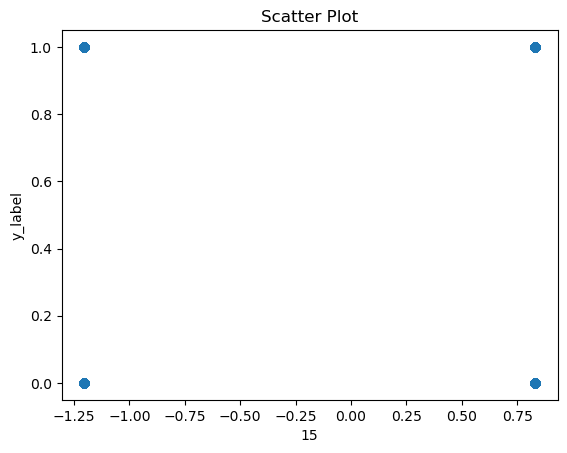

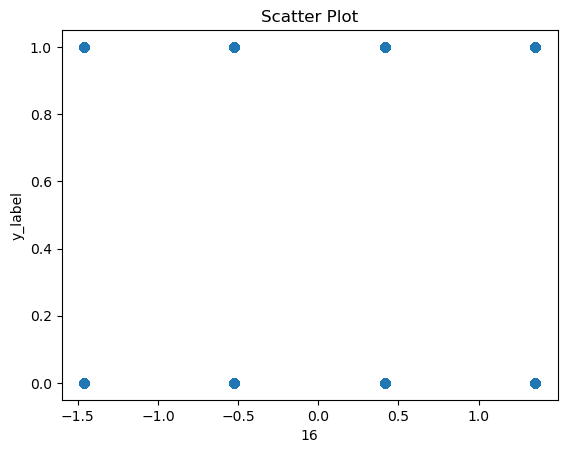

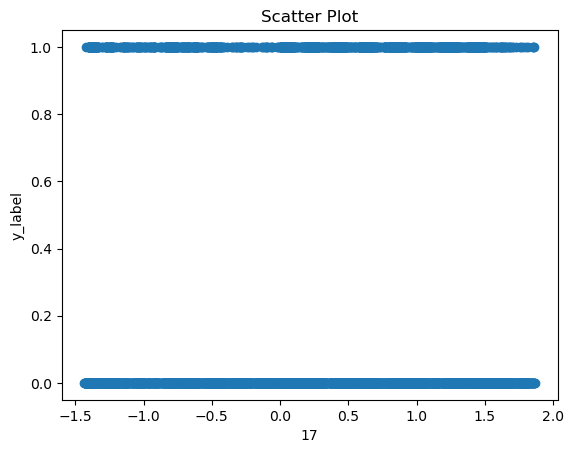

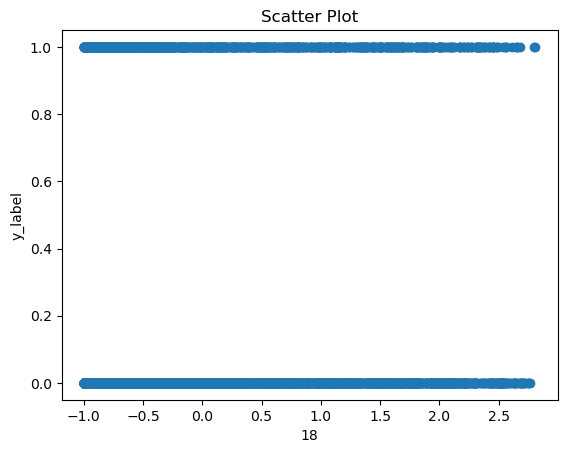

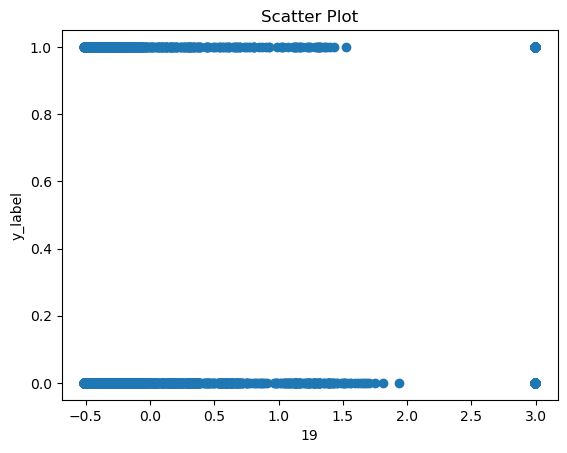

In [21]:
# relation beween every feature and label 


for col in processed_train_features.columns :
    plt.xlabel(col)
    plt.ylabel('y_label')
    plt.title("Scatter Plot")
    plt.scatter(processed_train_features[col], train_label_col)
    plt.show()

In [22]:
# dimension reduction

pca = PCA(n_components=0.9)  
X_train_pca = pca.fit_transform(processed_train_features)
X_test_pca = pca.transform(processed_test_features)

In [23]:
# Access the chosen features
chosen_features = pca.components_
print(chosen_features.shape)
print(chosen_features)

(15, 20)
[[-9.55281390e-03 -2.90783254e-02  2.60545253e-01  1.58895311e-01
   4.38855005e-01  3.71875285e-02  2.13510472e-01  8.13438093e-03
   2.20518427e-01  2.45329033e-01  3.00162939e-01  2.69457899e-01
   2.72957965e-01  2.81684378e-01  3.83547152e-01 -1.78558787e-03
  -2.17587955e-01  2.15352721e-01  7.51004666e-03  6.37253662e-03]
 [ 1.10059964e-02  3.24280437e-01 -9.27030661e-02 -2.81320234e-01
  -2.30461373e-02  8.58791632e-02  3.06222956e-01 -1.43496243e-01
  -2.60648892e-01 -2.16378285e-02  1.01393968e-02 -2.13282124e-01
   2.06162615e-01  1.98852968e-01 -2.61588313e-01  4.01268502e-01
  -8.75308436e-02  5.01207354e-01 -4.18826340e-03  1.84285368e-02]
 [ 3.44007382e-02  1.63516175e-02 -7.72780219e-04 -2.25690145e-02
   7.64952811e-02 -5.02705297e-01  1.05280366e-01 -5.71956590e-01
   1.14634988e-01 -9.00817212e-03 -4.37682671e-02  7.88365508e-02
  -1.52845196e-01 -1.39589664e-01 -1.54292979e-03  7.17636148e-02
  -1.11613707e-01 -1.02669650e-02  3.95689038e-01 -4.03449446e-01

In [24]:
# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Get the cumulative sum of explained variance ratios
cumulative_variance_ratios = np.cumsum(explained_variance_ratios)

# Find the indices of the chosen features
chosen_feature_indices = np.where(cumulative_variance_ratios >= 0.95)[0]

# Get the column names of the chosen features
chosen_feature_names = X_train_pca[chosen_feature_indices]

# Print the chosen feature names
print(chosen_feature_names)

[]


In [25]:
type(X_train_pca)

numpy.ndarray

In [26]:
X_train_pca.shape

(4488, 15)

In [27]:
type(X_test_pca)

numpy.ndarray

In [28]:
X_test_pca.shape

(235, 15)

In [29]:
pd.DataFrame(X_test_pca)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,0.304158,1.463024,-0.418923,-0.570838,1.071594,-0.224623,-1.203656,-1.535813,-0.108239,-1.369592,-1.610730,0.118495,1.172759,1.562590,0.072664
1,-0.303797,-0.476967,-1.069083,-0.131601,-0.540301,0.058693,0.961275,-0.640652,0.126063,-0.626408,0.128855,-1.114555,-0.693691,-0.300949,-1.281545
2,-3.141515,1.017132,1.077175,-0.167589,-0.342681,1.129561,0.750809,0.815183,-0.256655,0.954010,-1.252716,0.213153,-0.365450,0.287747,0.296914
3,-2.218491,-1.841612,0.679139,-0.042793,-0.288831,-0.877124,-0.950442,-0.731827,0.400726,0.638353,0.419289,1.236234,-0.288402,1.851232,-0.104535
4,2.669754,2.224415,-0.671824,0.196581,-0.375270,-0.074650,-0.745906,-0.156268,-0.676250,-1.734672,0.306545,0.330053,-0.013952,-0.747262,0.585141
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1.536283,1.921758,-2.138938,2.101087,-1.547696,-1.866584,-0.170132,-0.653848,-1.530856,-0.366989,0.528289,0.515214,0.178590,-0.885602,-0.799390
231,1.192923,1.921858,-0.689308,-0.107606,-0.659219,-0.145356,0.924535,-0.197336,1.255981,-1.131557,0.318611,-1.069128,0.301376,0.366553,1.135584
232,3.194611,0.661425,0.929316,-0.313445,2.065923,0.021329,-1.363293,-0.640124,1.126163,0.286362,0.213760,-0.320098,-0.482999,-0.293166,0.014642
233,3.469202,-1.612328,0.318349,-0.237380,0.371483,-0.760922,0.972918,-0.185031,1.127383,0.898634,-0.425358,1.236181,1.143263,0.168055,0.458511


In [30]:
# machine learning models
# logistic regression , decision tree , svm

clf1 = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf3 = svm.SVC(kernel='linear')

In [31]:
# grid for creating best of all models

In [32]:
# Create the grid search object for LogisticRegression

param_grid1 = {'C': [0.2, 0.01, 0.1],
               'penalty': ['l1', 'l2'],
               'solver': ['liblinear', 'saga'],
               'max_iter': [100 , 50 , 200],
              }

param_grid2 = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': [None, 'sqrt', 'log2', 'auto']
}
param_grid3 = {
    'C': [15, 8, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}




In [33]:
# Turn off warnings
warnings.filterwarnings("ignore")

param_grids = [param_grid1, param_grid2, param_grid3]
classifiers = [clf1, clf2, clf3]   

for clf , param_grid in zip(classifiers  , param_grids) :

    
    grid_search = GridSearchCV(clf, param_grid, cv=5)
    grid_search.fit(X_train_pca, train_label_col)
    
    best_params = grid_search.best_params_
    best_score = grid_search.best_score_    
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test_pca)
    accuracy = accuracy_score(test_label_col, y_pred)
    
    print(f"Predictions with {clf.__class__.__name__}:")
    print("Best Parameters: ", best_params)
    print("Best Score: ", best_score)
    print("Accuracy: ", accuracy)
    print('*********************************************')


    

Predictions with LogisticRegression:
Best Parameters:  {'C': 0.2, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best Score:  0.7878729643230467
Accuracy:  0.825531914893617
*********************************************
Predictions with DecisionTreeClassifier:
Best Parameters:  {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Best Score:  0.755557872939494
Accuracy:  0.774468085106383
*********************************************
Predictions with SVC:
Best Parameters:  {'C': 15, 'gamma': 'scale', 'kernel': 'linear'}
Best Score:  0.7883191434948964
Accuracy:  0.8212765957446808
*********************************************


In [34]:
# best model 

best_clf = LogisticRegression(C= 0.2, max_iter= 100, penalty= 'l1', solver= 'saga')

best_clf.fit(X_train_pca, train_label_col)
y_pred = best_model.predict(X_test_pca)


In [35]:
# evaluation

# confusion matrix
conf_matrix = confusion_matrix(test_label_col, y_pred)
print("Confusion matrix:\n", conf_matrix)
print('_______________________________________________________')

# classification report
class_report = classification_report(test_label_col, y_pred)
print("\nClassification report:\n", class_report)
print('_______________________________________________________')

# accuracy score
accuracy = accuracy_score(test_label_col, y_pred)
print("\nAccuracy score:", accuracy)

Confusion matrix:
 [[162  22]
 [ 20  31]]
_______________________________________________________

Classification report:
               precision    recall  f1-score   support

         0.0       0.89      0.88      0.89       184
         1.0       0.58      0.61      0.60        51

    accuracy                           0.82       235
   macro avg       0.74      0.74      0.74       235
weighted avg       0.82      0.82      0.82       235

_______________________________________________________

Accuracy score: 0.8212765957446808


In [36]:
# also using voting

In [37]:
voting_clf = VotingClassifier(estimators = [('Logistic Regression', clf1),
                                            ('Decision Tree', clf2),
                                            ('SVM', clf3)],
                              voting = 'hard')

In [38]:
# Access the data inside the VotingClassifier                                              
for name, model in voting_clf.estimators:
    print(f"Model: {name}")
    print(f"Type: {type(model)}")
    print(f"Parameters: {model.get_params()}")
    print("*******************************************************************************************8")

Model: Logistic Regression
Type: <class 'sklearn.linear_model._logistic.LogisticRegression'>
Parameters: {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
*******************************************************************************************8
Model: Decision Tree
Type: <class 'sklearn.tree._classes.DecisionTreeClassifier'>
Parameters: {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
*******************************************************************************************8
Model: SVM
Type: <class 'sklearn.svm._classes.SVC'>
Paramet

In [39]:
voting_clf.fit(X_train_pca, train_label_col)

VotingClassifier(estimators=[('Logistic Regression', LogisticRegression()),
                             ('Decision Tree', DecisionTreeClassifier()),
                             ('SVM', SVC(kernel='linear'))])

In [40]:
# prediction

y_pred = voting_clf.predict(X_test_pca)


In [41]:
# evaluation

# confusion matrix
conf_matrix = confusion_matrix(test_label_col, y_pred)
print("Confusion matrix:\n", conf_matrix)
print('_______________________________________________________')

# classification report
class_report = classification_report(test_label_col, y_pred)
print("\nClassification report:\n", class_report)
print('_______________________________________________________')

# accuracy score
accuracy = accuracy_score(test_label_col, y_pred)
print("\nAccuracy score:", accuracy)

Confusion matrix:
 [[164  20]
 [ 22  29]]
_______________________________________________________

Classification report:
               precision    recall  f1-score   support

         0.0       0.88      0.89      0.89       184
         1.0       0.59      0.57      0.58        51

    accuracy                           0.82       235
   macro avg       0.74      0.73      0.73       235
weighted avg       0.82      0.82      0.82       235

_______________________________________________________

Accuracy score: 0.8212765957446808
